Para convertirte en especialista del filtrado de datos, es esencial entender el concepto de índices en los DataFrames y Series de pandas porque los índices afectan a la forma de filtrar un DataFrame cuando utilizas otro DataFrame o Series para hacer el filtrado.

Ya has aprendido un poco sobre DataFrames e indexación de Series en el sprint de Python básico. En esta lección, hablaremos de forma más técnica sobre lo que es un índice. Aprenderemos sobre los diferentes tipos de índices, revisaremos el atributo loc[], introduciremos el atributo iloc[] y aprenderemos a establecer nuestros propios valores de índice en Series y DataFrames.

El atributo index
Los objetos Series y DataFrame en pandas siempre tienen índices que se almacenan en el atributo index. Cada vez que creas un Series o un DataFrame, su atributo de index se crea automáticamente con valores por defecto si no especificas los valores del índice.

Vamos a crear un objeto Series para demostrarlo:

import pandas as pd

oceans = pd.Series(['Pacific', 'Atlantic', 'Indian', 'Southern', 'Arctic'])

print(oceans)
0     Pacific
1    Atlantic
2      Indian
3    Southern
4      Arctic
dtype: object
Aquí, usamos la clase Series() de pandas para crear un objeto Series almacenado en la variable oceans usando una lista de nombres de océanos. La impresión de Series tiene tres componentes:

Los valores de Series a la derecha (nombres de los océanos).

Los valores del índice a la izquierda (enteros de 0 a 4).

El tipo de datos de pandas de los elementos Series en la parte inferior (dtype: object).

No especificamos un índice cuando creamos el Series, así que obtuvimos el índice por defecto: enteros consecutivos que comienzan en cero.

Veamos con más detalle el índice al acceder al atributo index y a su tipo:

import pandas as pd

oceans = pd.Series(['Pacific', 'Atlantic', 'Indian', 'Southern', 'Arctic'])

print(oceans.index)
print(type(oceans.index))

RangeIndex(start=0, stop=5, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>

Este índice es del tipo RangeIndex. Es la primera vez que encontramos este tipo. Básicamente, se trata de un rango de índices utilizados para un Series o un DataFrame. Este es el tipo de índice predeterminado utilizado por DataFrame y Series, pero no es el único tipo de datos de índice en pandas.

El tipo RangeIndex consta de tres parámetros: start=, stop= y step=.

start= es el primer índice de un Series o DataFrame.
stop= es el último índice. Como puedes ver, no está incluido en un Series o un DataFrame.

step= es la distancia desde el índice start hasta el índice stop. Por defecto, es 1.

También podemos establecer el índice que queramos. Por ejemplo, vamos a establecer los valores de índice utilizando una lista de números enteros del 1 al 5 asignando esta lista de números al atributo index de oceans:

import pandas as pd

oceans = pd.Series(['Pacific', 'Atlantic', 'Indian', 'Southern', 'Arctic'])

oceans.index = [1, 2, 3, 4, 5]

print(oceans.index)
print(type(oceans.index))

Int64Index([1, 2, 3, 4, 5], dtype='int64')
<class 'pandas.core.indexes.numeric.Int64Index'>

En este caso, nuestro índice es del tipo de datos Int64Index, que es un tipo general para un índice de valores enteros que no se generan a partir de un objeto range. No te preocupes sobre la gran cantidad de nuevos tipos de datos. No son más que tipos de índice que puedes mantener por defecto o establecer por tu cuenta.

También podemos establecer el atributo index utilizando el parámetro index= en la llamada a Series(), lo cual es preferible si no queremos el índice predeterminado y no planeamos modificar el índice posteriormente:

import pandas as pd

oceans = pd.Series(['Pacific', 'Atlantic', 'Indian', 'Southern', 'Arctic'],
                   index=[1, 2, 3, 4, 5])

print(oceans.index)
print(type(oceans.index))

Int64Index([1, 2, 3, 4, 5], dtype='int64')
<class 'pandas.core.indexes.numeric.Int64Index'>

Por último, vamos a configurar nuestros valores de índice como cadenas y a comprobar qué tipo de datos obtenemos para el índice:

import pandas as pd

oceans = pd.Series(['Pacific', 'Atlantic', 'Indian', 'Southern', 'Arctic'],
                   index=['A', 'B', 'C', 'D', 'E'])

print(oceans)
print()
print(oceans.index)
print(type(oceans.index))
A     Pacific
B    Atlantic
C      Indian
D    Southern
E      Arctic
dtype: object

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')
<class 'pandas.core.indexes.base.Index'>

Para los valores de índice de cadenas (o una combinación de cadenas y otros tipos), obtenemos el tipo de datos de índice general, Index.

Indexación mediante loc[]
Ahora que tienes una comprensión más profunda de lo que es un índice de pandas, vamos a hablar de indexación. La terminología puede ser confusa, así que ten en cuenta estas definiciones:

Index (índice): un componente de un Series o DataFrame, accesible mediante el atributo index.

Indexing (indexación): el proceso de acceder a los valores de un Series o DataFrame utilizando sus índices.

Ya sabes cómo utilizar el atributo loc[] para acceder a los elementos del DataFrame utilizando los valores de los índices y los nombres de las columnas, y por eso aquí solo lo repasaremos brevemente.

Empecemos por crear un DataFrame:

import pandas as pd

states  = ['Alabama', 'Alaska', 'Arizona', 'Arkansas']

flowers = ['Camellia', 'Forget-me-not', 'Saguaro cactus blossom', 'Apple blossom']

insects = ['Monarch butterfly', 'Four-spotted skimmer dragonfly', 'Two-tailed swallowtail', 'European honey bee']

index   = ['state 1', 'state 2', 'state 3', 'state 4']

df = pd.DataFrame({'state': states, 'flower': flowers, 'insect': insects}, index=index)

print(df)

            state                  flower                          insect

state 1   Alabama                Camellia               Monarch butterfly

state 2    Alaska           Forget-me-not  Four-spotted skimmer dragonfly

state 3   Arizona  Saguaro cactus blossom          Two-tailed swallowtail

state 4  Arkansas           Apple blossom              European honey bee

Hemos creado un pequeño DataFrame que contiene la flor y el insecto oficiales de cuatro estados de EE. UU., y hemos configurado los valores del índice como cadenas utilizando el parámetro index=.

Recuerda que podemos acceder a los elementos de nuestro DataFrame con loc[] pasando los valores de los índices y los nombres de las columnas como df.loc[index_value, col_name]. Así es como podemos conseguir el insecto del estado de Arkansas:

import pandas as pd

states  = ['Alabama', 'Alaska', 'Arizona', 'Arkansas']

flowers = ['Camellia', 'Forget-me-not', 'Saguaro cactus blossom', 'Apple blossom']

insects = ['Monarch butterfly', 'Four-spotted skimmer dragonfly', 'Two-tailed swallowtail', 'European honey bee']

index   = ['state 1', 'state 2', 'state 3', 'state 4']

df = pd.DataFrame({'state': states, 'flower': flowers, 'insect': insects}, index=index)

print(df.loc['state 4', 'insect'])

European honey bee

Esto devolvió un solo elemento. También podemos utilizar loc[] para devolver múltiples elementos como un Series u otro DataFrame. Para obtener varios elementos, basta con pasar a loc[] una lista de índices y una lista de columnas de la siguiente manera:

df.loc[[index_value_1, index_value_1], [col_name_1, col_name_2]]
A continuación, aprendamos a utilizar la indexación para obtener un rango de índices para una única columna. Para hacerlo, solo hay que especificar el primer y el último índice separados por un :. Aquí tenemos un ejemplo que devuelve las flores de los tres primeros índices de un DataFrame:

import pandas as pd

states  = ['Alabama', 'Alaska', 'Arizona', 'Arkansas']

flowers = ['Camellia', 'Forget-me-not', 'Saguaro cactus blossom', 'Apple blossom']

insects = ['Monarch butterfly', 'Four-spotted skimmer dragonfly', 'Two-tailed swallowtail', 'European honey bee']

index   = ['state 1', 'state 2', 'state 3', 'state 4']

df = pd.DataFrame({'state': states, 'flower': flowers, 'insect': insects}, index=index)

print(df.loc['state 1': 'state 3', 'flower'])

state 1                  Camellia

state 2             Forget-me-not

state 3    Saguaro cactus blossom

Name: flower, dtype: object

Como puedes ver, hemos obtenido los valores de la columna 'flower' para los tres primeros estados, que hemos seleccionado indexando 'state 1': 'state 3'.

De la misma manera, puedes seleccionar múltiples columnas así como índices:

import pandas as pd

states  = ['Alabama', 'Alaska', 'Arizona', 'Arkansas']

flowers = ['Camellia', 'Forget-me-not', 'Saguaro cactus blossom', 'Apple blossom']

insects = ['Monarch butterfly', 'Four-spotted skimmer dragonfly', 'Two-tailed swallowtail', 'European honey bee']

index   = ['state 1', 'state 2', 'state 3', 'state 4']

df = pd.DataFrame({'state': states, 'flower': flowers, 'insect': insects}, index=index)

print(df.loc['state 1': 'state 3', 'flower': 'insect'])

                                                flower                          insect

state 1                Camellia               Monarch butterfly

state 2           Forget-me-not  Four-spotted skimmer dragonfly

state 3  Saguaro cactus blossom          Two-tailed swallowtail

El código anterior devuelve una tabla filtrada con los valores de las columnas 'flower' a 'insect', para los índices, empezando por 'state 1' hasta 'state 3' (inclusive).

Para futuras referencias, aquí hay una tabla de comandos de sintaxis loc[]:

![comandos-loc[].png](attachment:comandos-loc[].png)

Indexación mediante iloc[]
También podemos indexar un DataFrame utilizando las posiciones numéricas de sus filas y columnas con iloc[]. 

Mientras que loc[] utiliza el índice y las etiquetas de columnas para acceder a los elementos, iloc[] utiliza enteros para designar las posiciones de los elementos que necesitas obtener.

import pandas as pd

states  = ['Alabama', 'Alaska', 'Arizona', 'Arkansas']

flowers = ['Camellia', 'Forget-me-not', 'Saguaro cactus blossom', 'Apple blossom']

insects = ['Monarch butterfly', 'Four-spotted skimmer dragonfly', 'Two-tailed swallowtail', 'European honey bee']

index   = ['state 1', 'state 2', 'state 3', 'state 4']

df = pd.DataFrame({'state': states, 'flower': flowers, 'insect': insects}, index=index)

print(df)
print()
print(df.iloc[3, 2])

            state                  flower                          insect

state 1   Alabama                Camellia               Monarch butterfly

state 2    Alaska           Forget-me-not  Four-spotted skimmer dragonfly

state 3   Arizona  Saguaro cactus blossom          Two-tailed swallowtail

state 4  Arkansas           Apple blossom              European honey bee

European honey bee

Aquí, seleccionamos el elemento de la 4ª fila y la 3ª columna, que contiene el insecto del estado de Arkansas. Este es el mismo resultado que obtuvimos utilizando df.loc['state 4', 'insect']. A diferencia de loc[], iloc[] funciona con la indexación 0 normal de Python que te es familiar.

De la misma manera que con loc[], podemos acceder a múltiples filas y/o columnas con iloc[] pasándole listas de sus posiciones o utilizando el slicing. Así es como podemos conseguir el mismo resultado que obtenemos con

 df.loc[['state 1', 'state 3'], ['flower', 'insect']] utilizando iloc[]:

import pandas as pd

states  = ['Alabama', 'Alaska', 'Arizona', 'Arkansas']
flowers = ['Camellia', 'Forget-me-not', 'Saguaro cactus blossom', 'Apple blossom']
insects = ['Monarch butterfly', 'Four-spotted skimmer dragonfly', 'Two-tailed swallowtail', 'European honey bee']
index   = ['state 1', 'state 2', 'state 3', 'state 4']

df = pd.DataFrame({'state': states, 'flower': flowers, 'insect': insects}, index=index)

print(df)
print()
print(df.iloc[[0, 2], 1:])

            state                  flower                          insect
state 1   Alabama                Camellia               Monarch butterfly
state 2    Alaska           Forget-me-not  Four-spotted skimmer dragonfly
state 3   Arizona  Saguaro cactus blossom          Two-tailed swallowtail
state 4  Arkansas           Apple blossom              European honey bee

                         flower                  insect
state 1                Camellia       Monarch butterfly
state 3  Saguaro cactus blossom  Two-tailed swallowtail

El código anterior selecciona la primera fila con índice 0 de Python (o índice 'state 1' en nuestro DataFrame) y la tercera fila con índice 2 de Python (o índice 'state 3' en nuestro DataFrame). En cuanto a las columnas, selecciona todas las columnas a partir de la segunda (que tiene un índice 1 de Python o el nombre 'flower') hasta la última columna inclusive.

Por cierto, también se puede utilizar la indexación negativa. Aquí tienes un ejemplo en el que se selecciona la última columna (que tiene un índice de Python -1) y las filas 1ª y 3ª (índices de Python 0 y 2):

import pandas as pd

states  = ['Alabama', 'Alaska', 'Arizona', 'Arkansas']

flowers = ['Camellia', 'Forget-me-not', 'Saguaro cactus blossom', 'Apple blossom']

insects = ['Monarch butterfly', 'Four-spotted skimmer dragonfly', 'Two-tailed swallowtail', 'European honey bee']

index   = ['state 1', 'state 2', 'state 3', 'state 4']

df = pd.DataFrame({'state': states, 'flower': flowers, 'insect': insects}, index=index)

print(df.iloc[[0, 2], -1])
state 1         Monarch butterfly
state 3    Two-tailed swallowtail
Name: insect, dtype: object
Pregunta

¿Qué línea de código producirá la misma salida que df.loc['state 2':'state 4', 'insect']? Como recordatorio, aquí está la impresión del DataFrame:

            state                  flower                          insect
state 1   Alabama                Camellia               Monarch butterfly
state 2    Alaska           Forget-me-not  Four-spotted skimmer dragonfly
state 3   Arizona  Saguaro cactus blossom          Two-tailed swallowtail
state 4  Arkansas           Apple blossom              European honey bee

Y aquí está el resultado esperado:

state 2    Four-spotted skimmer dragonfly
state 3            Two-tailed swallowtail
state 4                European honey bee
Name: insect, dtype: object

df.iloc[:, 2]

df.iloc[1:, :]

df.iloc[1:, -1]

¡Así es! Podemos utilizar -1 para seleccionar la última columna, al igual que con las listas de Python.

df.iloc[1:3, :2]

¡Tu comprensión del material es impresionante!
Ahora que conoces tanto loc[] como iloc[], ¿cómo distingues cuál es el mejor?

Usar iloc[] puede ser más conveniente si sabes que solo quieres ver las primeras filas o columnas, o cuando sabes el número exacto de fila o columna que necesitas. iloc[] también puede ser útil como un atajo para ahorrar tiempo al escribir nombres de columnas o etiquetas de índices.

Usar loc[] puede lograr una mejor legibilidad y comprensión de lo que tu código está haciendo, tanto para tus colegas que leen tu código como para tu yo del futuro.

En última instancia, no importa si se utiliza loc[] o iloc[] para indexar un DataFrame siempre y cuando se obtengan los elementos correctos. Es tu decisión elegir lo que prefieres.

Cambiar el índice de un DataFrame con el método set_index()
Anteriormente, aprendimos dos maneras de establecer valores de índice:

Pasar los valores del índice al parámetro index= al crear un DataFrame o un Series.

Asignar los valores del índice al atributo index de un DataFrame o Series existente.

En el caso de los DataFrames, existe otra forma de establecer los valores del índice mediante el método set_index(). Este método toma una columna existente de un DataFrame y reemplaza el índice con los valores de esa columna:

import pandas as pd

states  = ['Alabama', 'Alaska', 'Arizona', 'Arkansas']
flowers = ['Camellia', 'Forget-me-not', 'Saguaro cactus blossom', 'Apple blossom']
insects = ['Monarch butterfly', 'Four-spotted skimmer dragonfly', 'Two-tailed swallowtail', 'European honey bee']
index   = ['state 1', 'state 2', 'state 3', 'state 4']

df = pd.DataFrame({'state': states, 'flower': flowers, 'insect': insects}, index=index)

df = df.set_index('state') # reemplazar el índice

print(df)
print()
print(df.index)

                          flower                          insect
state                                                           
Alabama                 Camellia               Monarch butterfly
Alaska             Forget-me-not  Four-spotted skimmer dragonfly
Arizona   Saguaro cactus blossom          Two-tailed swallowtail
Arkansas           Apple blossom              European honey bee

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas'], dtype='object', name='state')

Originalmente, nuestros índices eran números de estado: 'state 1', 'state 2' etc. Después, los sustituimos por los valores de la columna 'state'.

Podemos ver en el resultado que df ahora solo tiene dos columnas: 'flower' e 'insect'. El índice ha sido sustituido por los valores que había en state'. El nuevo índice también tiene un componente de nombre, que no hemos visto antes. El nombre del índice es 'state' porque set_index() da al nuevo índice el nombre de la antigua columna de forma automática.

Si no quieres que el índice tenga un nombre, puedes eliminarlo estableciendo el atributo index_name de un DataFrame a None. Así es como puedes hacerlo:

import pandas as pd

states  = ['Alabama', 'Alaska', 'Arizona', 'Arkansas']
flowers = ['Camellia', 'Forget-me-not', 'Saguaro cactus blossom', 'Apple blossom']
insects = ['Monarch butterfly', 'Four-spotted skimmer dragonfly', 'Two-tailed swallowtail', 'European honey bee']
index   = ['state 1', 'state 2', 'state 3', 'state 4']

df = pd.DataFrame({'state': states, 'flower': flowers, 'insect': insects}, index=index)
df = df.set_index('state')

df.index.name = None
print(df)
print()
print(df.index)

                          flower                          insect
Alabama                 Camellia               Monarch butterfly
Alaska             Forget-me-not  Four-spotted skimmer dragonfly
Arizona   Saguaro cactus blossom          Two-tailed swallowtail
Arkansas           Apple blossom              European honey bee

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas'], dtype='object')
En la próxima lección, aprenderás más formas de filtrar datos. A continuación, uniremos tus habilidades de indexación y tus nuevas habilidades de filtrado para obtener técnicas de filtrado aún más avanzadas. Pero de momento, es hora de practicar un poco más con los ejercicios.
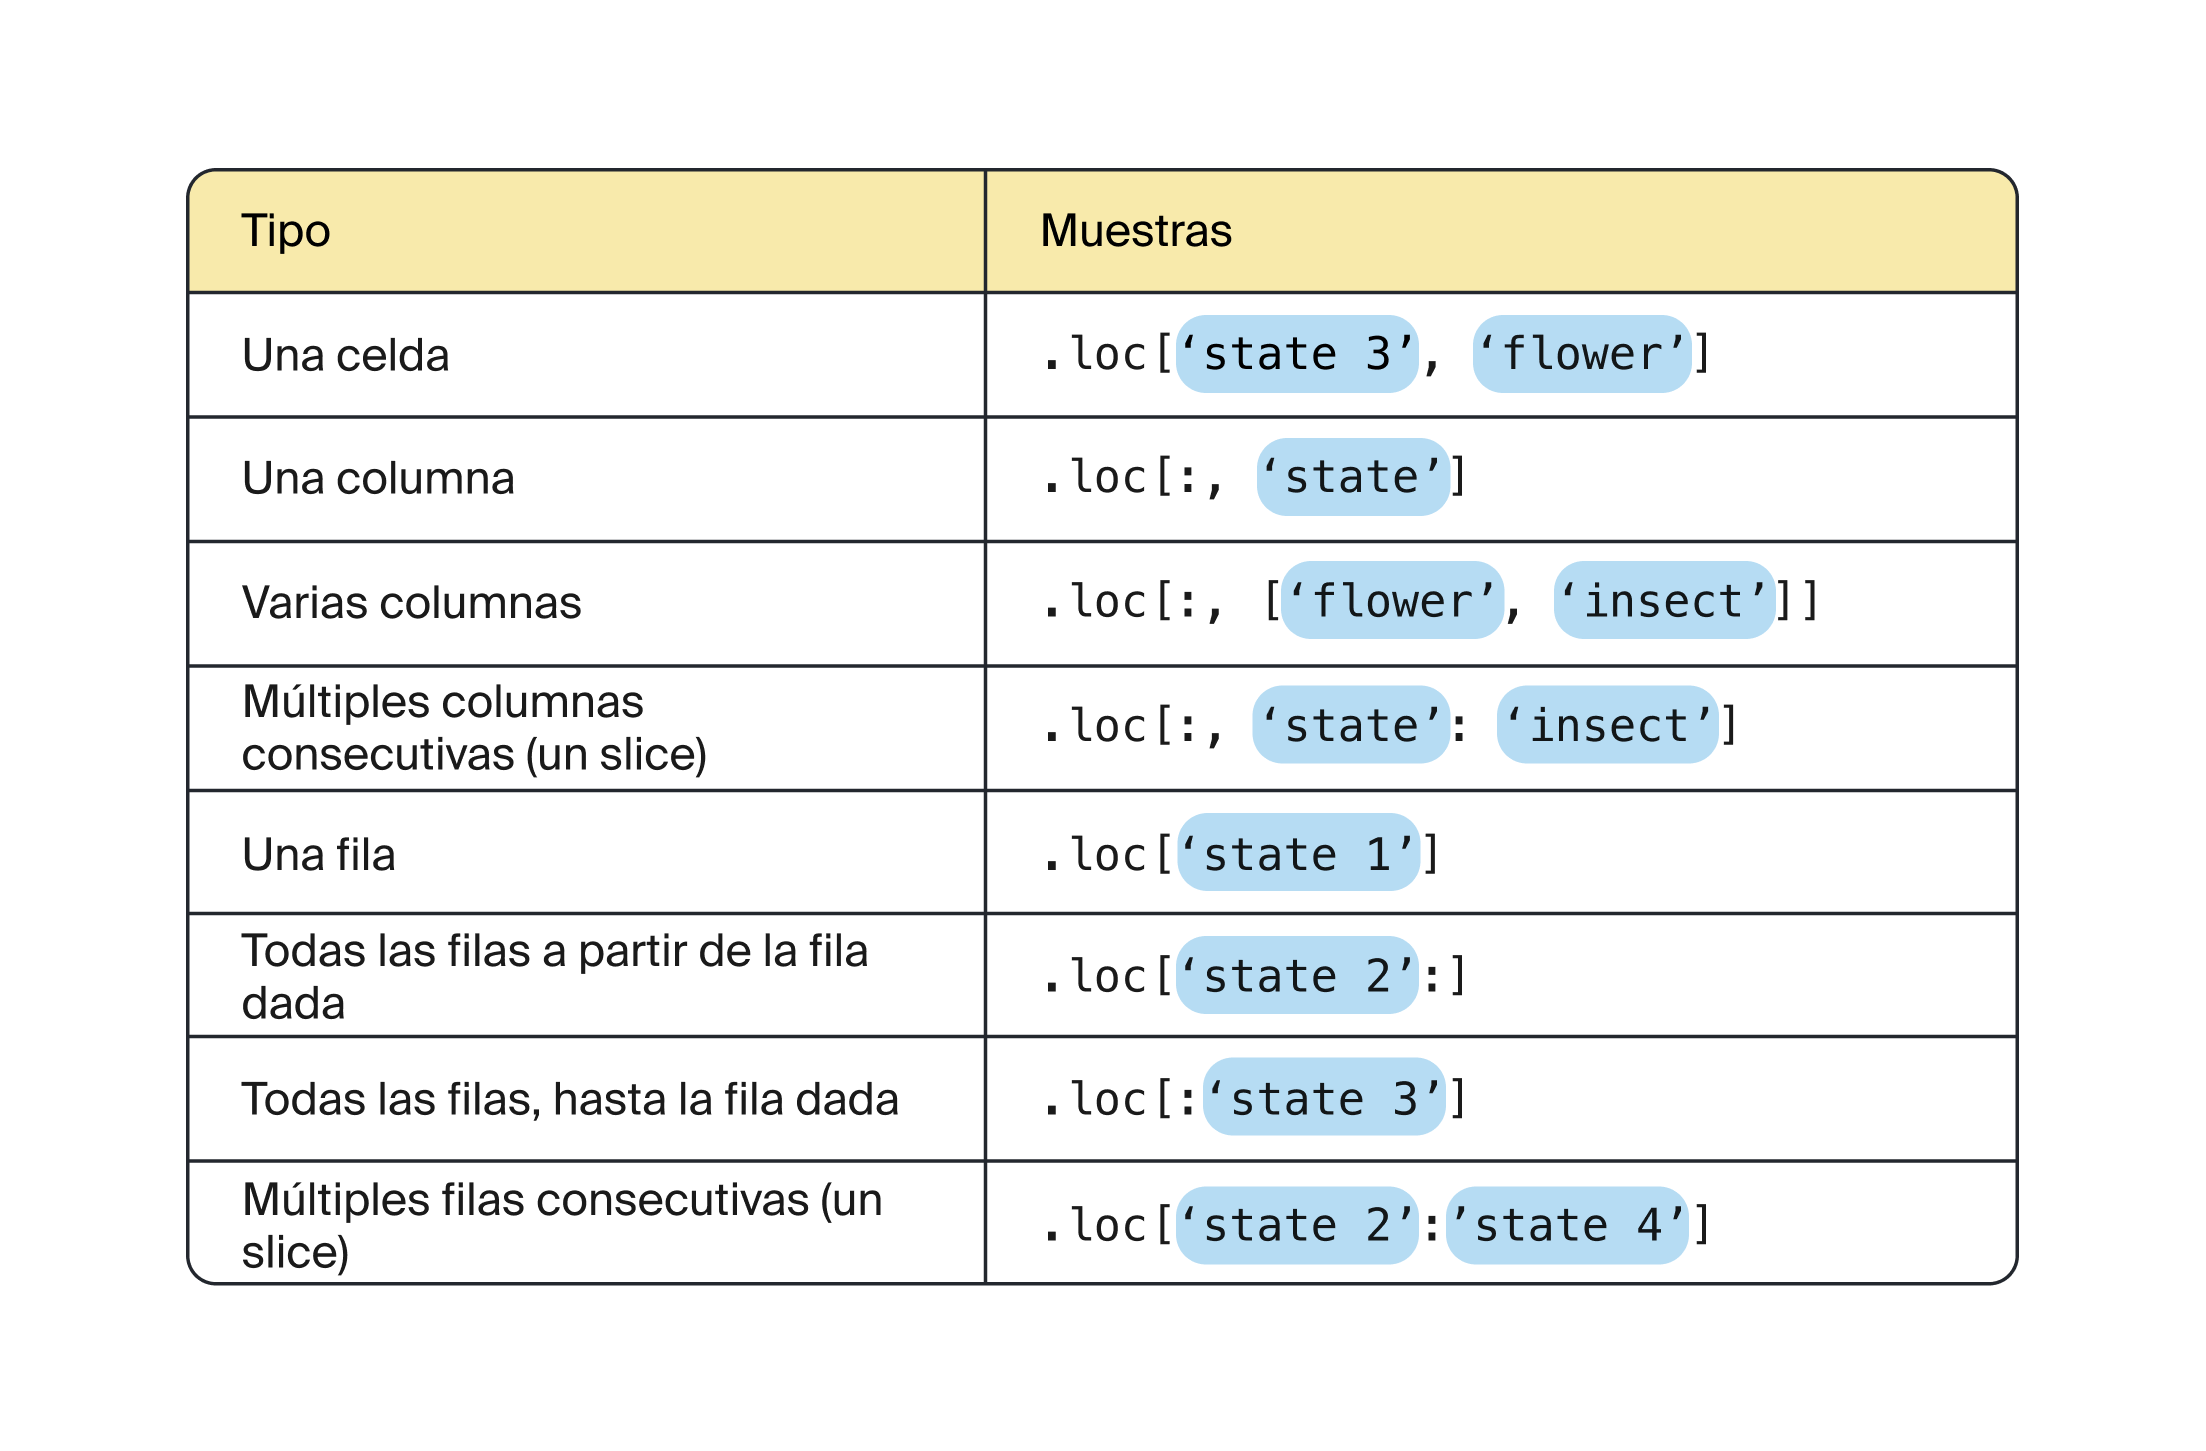

Ejercicio 1

Siguiendo con nuestro  DataFrame que contiene la flor y el insecto oficiales de cuatro estados de EE.UU., utiliza loc[] para retornar la columna 'flower' e 'insect' para los estados 1 y 3.

In [1]:
import pandas as pd

states  = ['Alabama', 'Alaska', 'Arizona', 'Arkansas']
flowers = ['Camellia', 'Forget-me-not', 'Saguaro cactus blossom', 'Apple blossom']
insects = ['Monarch butterfly', 'Four-spotted skimmer dragonfly', 'Two-tailed swallowtail', 'European honey bee']
index   = ['state 1', 'state 2', 'state 3', 'state 4']

df = pd.DataFrame({'state': states, 'flower': flowers, 'insect': insects}, index=index)

filtered_df = df.loc[['state 1', 'state 3'], ['flower', 'insect']]# escribe tu código aquí
print(filtered_df)

                         flower                  insect
state 1                Camellia       Monarch butterfly
state 3  Saguaro cactus blossom  Two-tailed swallowtail


Ejercicio 2

Esta vez, utiliza loc[] para obtener solo la columna 'insect' para todos los estados, excepto Alabama.

In [2]:
import pandas as pd

states  = ['Alabama', 'Alaska', 'Arizona', 'Arkansas']
flowers = ['Camellia', 'Forget-me-not', 'Saguaro cactus blossom', 'Apple blossom']
insects = ['Monarch butterfly', 'Four-spotted skimmer dragonfly', 'Two-tailed swallowtail', 'European honey bee']
index   = ['state 1', 'state 2', 'state 3', 'state 4']

df = pd.DataFrame({'state': states, 'flower': flowers, 'insect': insects}, index=index)

filtered_df_2 = df.loc['state 2':, 'insect']# escribe tu código aquí
print(filtered_df_2)

state 2    Four-spotted skimmer dragonfly
state 3            Two-tailed swallowtail
state 4                European honey bee
Name: insect, dtype: object


Ejercicio 1

Utiliza loc[] para extraer las flores de Alabama, Alaska y Arizona, y guarda el resultado en la variable flowers. Luego, muestra esta variable.

El precódigo ya crea el DataFrame por ti y establece la columna 'state' como índice, así que asegúrate de usar los nombres de los estados como valores del índice en loc[].

In [3]:
import pandas as pd

states  = ['Alabama', 'Alaska', 'Arizona', 'Arkansas']
flowers = ['Camellia', 'Forget-me-not', 'Saguaro cactus blossom', 'Apple blossom']
insects = ['Monarch butterfly', 'Four-spotted skimmer dragonfly', 'Two-tailed swallowtail', 'European honey bee']
index   = ['state 1', 'state 2', 'state 3', 'state 4']

df = pd.DataFrame({'state': states, 'flower': flowers, 'insect': insects}, index=index)
df = df.set_index('state')

flowers = df.loc[:'Arizona', 'flower']# escribe tu código aquí
print(flowers)

state
Alabama                  Camellia
Alaska              Forget-me-not
Arizona    Saguaro cactus blossom
Name: flower, dtype: object


Ejercicio 2

Ahora utiliza iloc[] para indexar exactamente la misma parte del DataFrame que usaste en la última tarea. Igual que hicimos antes, guarda el resultado en la variable flowers e imprímela.

In [4]:
import pandas as pd

states  = ['Alabama', 'Alaska', 'Arizona', 'Arkansas']
flowers = ['Camellia', 'Forget-me-not', 'Saguaro cactus blossom', 'Apple blossom']
insects = ['Monarch butterfly', 'Four-spotted skimmer dragonfly', 'Two-tailed swallowtail', 'European honey bee']
index   = ['state 1', 'state 2', 'state 3', 'state 4']

df = pd.DataFrame({'state': states, 'flower': flowers, 'insect': insects}, index=index)
df = df.set_index('state')

flowers = df.iloc[:3, 0]# escribe tu código aquí
print(flowers)

state
Alabama                  Camellia
Alaska              Forget-me-not
Arizona    Saguaro cactus blossom
Name: flower, dtype: object
